# Importing

In [9]:
import matplotlib.pyplot as plt
import fastai
import cv2
from fastai.vision import *
%matplotlib inline
import torchvision
%matplotlib inline

# Loading model

In [2]:
learn = load_learner("/Users/sandeep/Desktop/dataandmodles/models/ballDetection")

# Getting prediction

In [3]:
def unscaleCoord(imagePoint):
  '''
  Helper function for  getPrediction
  Returns [Height,Width]
  '''
  s = torch.tensor([imagePoint.size[0]/2 , imagePoint.size[1]/2],dtype=torch.float32)
  scaledCoord = imagePoint.data
  unscaledCoord = (scaledCoord+1.) * (s)
  return unscaledCoord

In [6]:
def getScaleFactors(imgW, imgH, originalImgH , originalImgW):
    '''
       Helper function for getPrediction
       Returns a tensor with given scalefactor (wdith,height). 
    '''
    return tensor(originalImgW/imgW , originalImgH/imgH);

In [175]:
#imagePoint.size[0]

360

In [177]:
#imagePoint.data 

tensor([[-0.4604, -0.2568]])

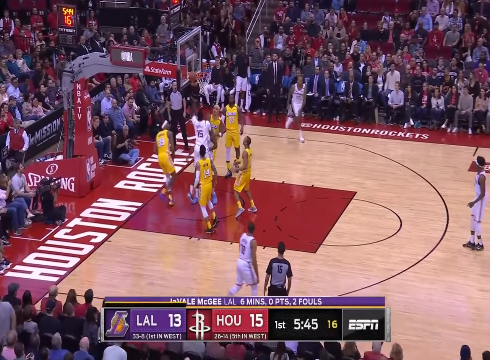

In [179]:
#test_img.resize(torch.Size([test_img.shape[0] ,360,490]))

In [4]:
def resizeFrame(frame):
    '''
    Helper function for getPrediction: that resizes the frames.
    Returns image of size (490, 360)
    '''
    resizedImg =  cv2.resize(frame[:] , (490 , 360))
    return resizedImg

In [7]:
def mapToOrginialImage(coord,scaleFactors):
    '''
      Helper function for getPrediction
      Returns coord (width, height)
    '''
    coordInOriginalImage = coord.flip(1) * scaleFactors
    return tuple(coordInOriginalImage[0].numpy())

In [62]:
def getPrediction(frame):
    '''Given an image, returns the ball coord '''
    resizedImg  = resizeFrame(frame[:])
#     resizedImg  = frame
    resizedImg = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)
    resizedImg = Image(pil2tensor(resizedImg, dtype=np.float32).div_(255))
    imagePoint = learn.predict(resizedImg)[0]
    scaleFactors = getScaleFactors(490,360,frame.shape[0],frame.shape[1])  
    unscaledCoord = unscaleCoord(imagePoint)
    coordInOriginalImage= mapToOrginialImage(unscaledCoord, scaleFactors);
    return coordInOriginalImage


In [25]:
#test_img = cv2.imread('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/dummy/4_layup success.png')

In [185]:
#coord = unscaleCoord(imagePoint)

In [193]:
 #test= cv2.resize(img, (490,360))

In [196]:
#center  = (coord.numpy()[0][1], coord.numpy()[0][0]);center

(182.07901, 97.12286)

# Puting prediction into original image

In [208]:
#scaleFactors = getScaleFactors(490,360,img.shape[0],img.shape[1]);scaleFactors

tensor([2.6122, 2.0000])

In [223]:
#coordInOriginalImage= mapToOrginialImage(coord , scaleFactors);

In [225]:
#drawn_img = cv2.circle(img,coordInOriginalImage,3,(255,255,0),1)

In [52]:
def drawPrediction(frame,coord):
    '''
    Given a frame and coordinate
    It draws a circle for you.
    '''
   # scaleFactors = getScaleFactors(490,360,frame.shape[0],frame.shape[1])   
    #coordInOriginalImage= mapToOrginialImage(coord, scaleFactors);
    frame = cv2.circle(frame,coord,30,(255,255,0),1);
    return frame

# Test

In [66]:
test_img = cv2.imread('/Users/sandeep/Desktop/dataandmodles/data/pz3Pointer2.png')


In [67]:
coord = getPrediction(test_img)
test_img_rgb = cv2.cvtColor(test_img,  cv2.COLOR_BGR2RGB)
result = drawPrediction(test_img_rgb, coord)

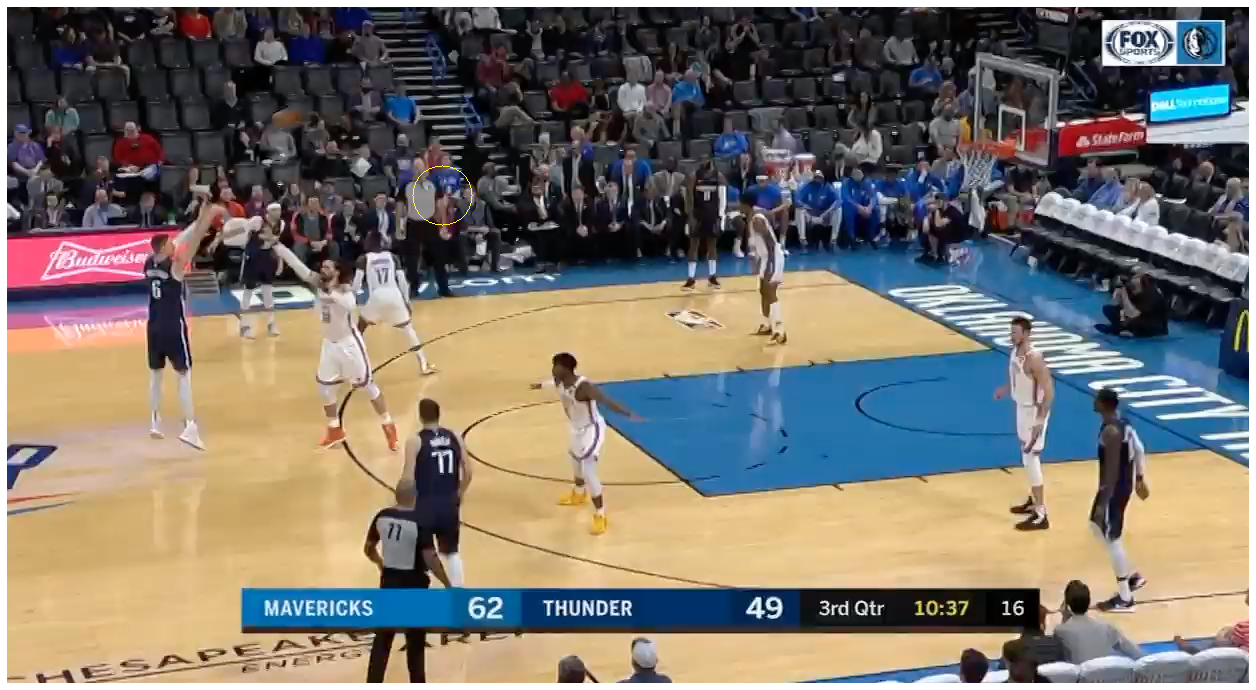

In [68]:

xpixels = result.shape[1]
ypixels = result.shape[0]
dpi = 72
scalefactor = 1
xinch = xpixels * scalefactor / dpi
yinch = ypixels * scalefactor / dpi
fig = plt.figure(figsize=(xinch,yinch))
ax = plt.axes([0, 0, 1, 1], frame_on=False, xticks=[], yticks=[])
img_plot = plt.imshow(result)

In [59]:
#x = learn.predict(test_img)

In [60]:
#imagePoint=x[0];imagePoint

ImagePoints (360, 490)

In [61]:
#coord = unscaleCoord(imagePoint)

In [56]:
#scaleFactors = getScaleFactors(490,360,img.shape[0],img.shape[1]);scaleFactors

tensor([2.6122, 2.0000])

In [62]:

#coordInOriginalImage= mapToOrginialImage(coord , scaleFactors);

In [63]:
#coordInOriginalImage

(475.63495, 194.24573)

In [ ]:
fig = plt.figure(figsize=())